In [72]:
import matplotlib.pyplot as mat
import pandas as pd
import requests
import json
import numpy as np
import datetime
import matplotlib.dates as mdates

def graph_Data(base_url, data_Type, topic2_Address,x_Label):

    response = requests.get(base_url)
    
    total_Data = response.json()
    
    any_Data = []
        
    dates = []
    
    for i in range(len(total_Data['data'])):
        any_Data.append(total_Data['data'][i][data_Type])
    
    for i in range(len(total_Data['data'])):
        dates.append(total_Data['data'][i]['timestamp'])
    
    dates = [date[5:10] for date in dates]
    
    
    any_Data.reverse()
        
    dates.reverse()

    block_Response = requests.get(f"https://api.etherscan.io/v2/api?chainid=1&module=logs&action=getLogs&toBlock=22313155&address=0x40907540d8a6C65c637785e8f8B742ae6b0b9968&topic2={topic2_Address}&page=1&offset=1000&apikey=SBBG1DGT11MVX5ZJQX9EVNYBA1HZCI8QII")

    block_Data = block_Response.json()

    exec_Time = block_Data['result'][1]['timeStamp']

    exec_Time = int(exec_Time, 16)
    
    exec_Time = datetime.datetime.fromtimestamp(exec_Time)

    exec_Time = str(exec_Time)

    exec_Time = exec_Time[5:10]

    
    mat.plot(dates, any_Data)
    
    mat.xlabel('Date')
    mat.ylabel(x_Label)
    
    mat.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    mat.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
    mat.axvline(x=exec_Time, color='r', linestyle='--', label='Specific Date')
    mat.axvline(x='03-19', color='r', linestyle='--', label='Specific Date')


    mat.figure(figsize=(20, 6))

    mat.show()


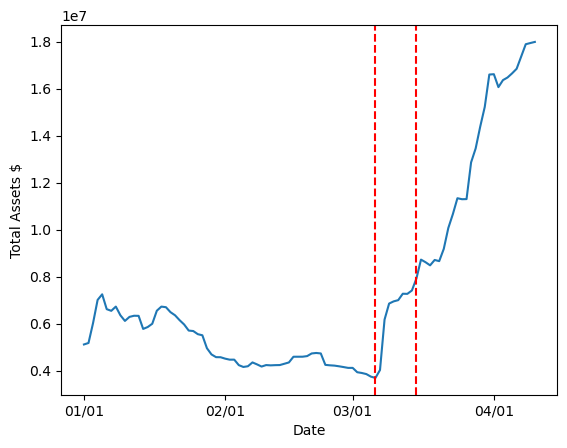

<Figure size 2000x600 with 0 Axes>

In [73]:
#this is sUSDe total asset graph

controller_Address = '0xB536FEa3a01c95Dd09932440eC802A75410139D6'

#look in curve proposal for address call is being sent to
address_to_without_0x = 'B536FEa3a01c95Dd09932440eC802A75410139D6'

what_Data = 'total_assets'
#choices for data type are 'lend_apy' 'borrow_apy' 'total_debt' 'total_assets' 

x_Label = 'Total Assets $'


#grpahing borrowing data
graph_Data(f'https://prices.curve.fi/v1/lending/markets/ethereum/{controller_Address}/snapshots?fetch_on_chain=false&agg=day&limit=100&sort_by=DATE_DESC',what_Data,f'0x000000000000000000000000{address_to_without_0x}', x_Label)


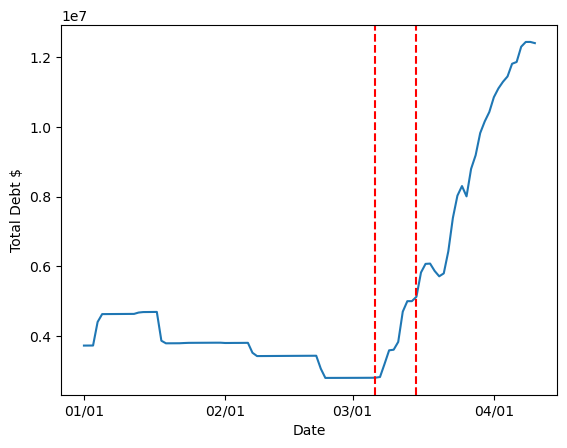

<Figure size 2000x600 with 0 Axes>

In [74]:
#this is sUSDe total_debt graph

controller_Address = '0xB536FEa3a01c95Dd09932440eC802A75410139D6'


#look in curve proposal for address call is being sent to
address_to_without_0x = 'B536FEa3a01c95Dd09932440eC802A75410139D6'

what_Data = 'total_debt'
#choices for data type are 'lend_apy' 'borrow_apy' 'total_debt' 'total_assets' 

x_Label = 'Total Debt $'


#grpahing borrowing data
graph_Data(f'https://prices.curve.fi/v1/lending/markets/ethereum/{controller_Address}/snapshots?fetch_on_chain=false&agg=day&limit=100&sort_by=DATE_DESC',what_Data,f'0x000000000000000000000000{address_to_without_0x}', x_Label)


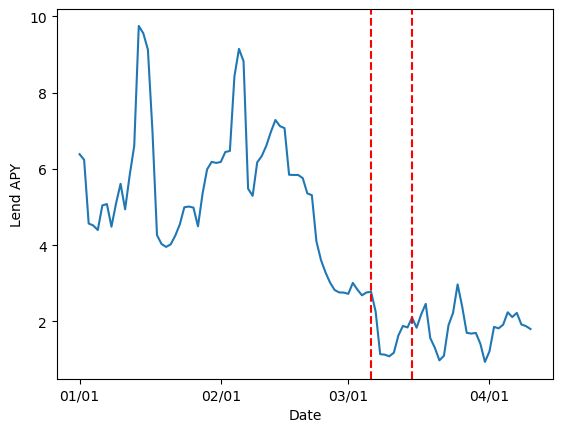

<Figure size 2000x600 with 0 Axes>

In [75]:
#this is sUSDe lend apy graph

controller_Address = '0xB536FEa3a01c95Dd09932440eC802A75410139D6'


#look in curve proposal for address call is being sent to
address_to_without_0x = 'B536FEa3a01c95Dd09932440eC802A75410139D6'

what_Data = 'lend_apy'
#choices for data type are 'lend_apy' 'borrow_apy' 'total_debt' 'total_assets' 

x_Label = 'Lend APY'


#grpahing borrowing data
graph_Data(f'https://prices.curve.fi/v1/lending/markets/ethereum/{controller_Address}/snapshots?fetch_on_chain=false&agg=day&limit=100&sort_by=DATE_DESC',what_Data,f'0x000000000000000000000000{address_to_without_0x}', x_Label)


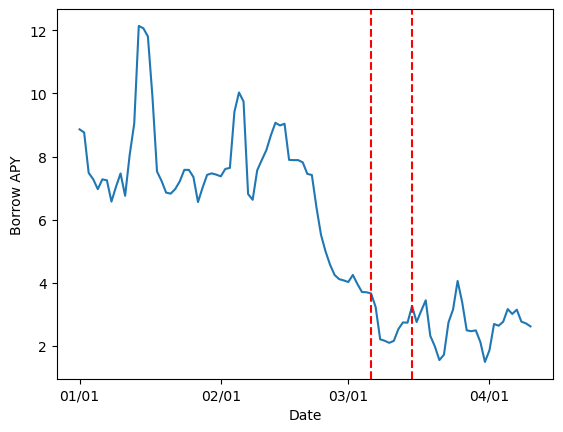

<Figure size 2000x600 with 0 Axes>

In [76]:
#this is sUSDe borrow apy graph

controller_Address = '0xB536FEa3a01c95Dd09932440eC802A75410139D6'


#look in curve proposal for address call is being sent to
address_to_without_0x = 'B536FEa3a01c95Dd09932440eC802A75410139D6'

what_Data = 'borrow_apy'
#choices for data type are 'lend_apy' 'borrow_apy' 'total_debt' 'total_assets' 

x_Label = 'Borrow APY'


#grpahing borrowing data
graph_Data(f'https://prices.curve.fi/v1/lending/markets/ethereum/{controller_Address}/snapshots?fetch_on_chain=false&agg=day&limit=100&sort_by=DATE_DESC',what_Data,f'0x000000000000000000000000{address_to_without_0x}', x_Label)


In [78]:
# The proposal that was introduced on 3/19 to the Curve DAO sought to replace monetary policy for the sUSDe-long Llamalend market.
# In the resulting graphs above, the first dotted red line is when the proposal took was introduced and the second line being when the monetary policy was enacted.
# There appears to be a sharp incline in the amount of total assets deposited and the total assets borrowed.
# However, this sharp incline may not be directly attributed to the proposal. Instead, the ending of Ethena Season 3 may have inspired airdrop farmers to deposit sUSDe to farm for Season 4.
# It should be noted that both lending and borrowing APY seem to follow the trend with previous data.